In [55]:
# Gerekli kütüphaneleri içe aktarılması
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.linear_model import Lasso, LinearRegression, Ridge, ElasticNet
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from sklearn.preprocessing import LabelEncoder


In [ ]:
# Veriyi yükle
data = pd.read_csv("Melbourne_housing_FULL.csv")

In [ ]:
# İlk 5 satırı görüntüle
data.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,68 Studley St,2,h,NaN,SS,Jellis,3/09/2016,2.5,3067.0,...,1.0,1.0,126.0,NaN,NaN,Yarra City Council,-37.8014,144.9958,Northern Metropolitan,4019.0
1,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra City Council,-37.7996,144.9984,Northern Metropolitan,4019.0
2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra City Council,-37.8079,144.9934,Northern Metropolitan,4019.0
3,Abbotsford,18/659 Victoria St,3,u,NaN,VB,Rounds,4/02/2016,2.5,3067.0,...,2.0,1.0,0.0,NaN,NaN,Yarra City Council,-37.8114,145.0116,Northern Metropolitan,4019.0
4,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra City Council,-37.8093,144.9944,Northern Metropolitan,4019.0


In [ ]:
#veriler hakkında detaylı bilgi, size,shape, dimension
print(f'shape : {data.shape}\n'
      f'size : {data.size}\n'
      f'dimension: {data.ndim}')
# verinin satır, sütun sayısı, bunlaın çarpımı ve boyutu:

shape : (34857, 21)
size : 731997
dimension: 2


In [ ]:
# Veri kümesi hakkında bilgi
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34857 entries, 0 to 34856
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         34857 non-null  object 
 1   Address        34857 non-null  object 
 2   Rooms          34857 non-null  int64  
 3   Type           34857 non-null  object 
 4   Price          27247 non-null  float64
 5   Method         34857 non-null  object 
 6   SellerG        34857 non-null  object 
 7   Date           34857 non-null  object 
 8   Distance       34856 non-null  float64
 9   Postcode       34856 non-null  float64
 10  Bedroom2       26640 non-null  float64
 11  Bathroom       26631 non-null  float64
 12  Car            26129 non-null  float64
 13  Landsize       23047 non-null  float64
 14  BuildingArea   13742 non-null  float64
 15  YearBuilt      15551 non-null  float64
 16  CouncilArea    34854 non-null  object 
 17  Lattitude      26881 non-null  float64
 18  Longti

In [ ]:
# Veriyi inceleyerek istatistiksel bilgilere bakın
data.describe()

,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
count,34857.000000,2.724700e+04,34856.000000,34856.000000,26640.000000,26631.000000,26129.000000,23047.000000,13742.00000,15551.000000,26881.000000,26881.000000,34854.000000
mean,3.031012,1.050173e+06,11.184929,3116.062859,3.084647,1.624798,1.728845,593.598993,160.25640,1965.289885,-37.810634,145.001851,7572.888306
std,0.969933,6.414671e+05,6.788892,109.023903,0.980690,0.724212,1.010771,3398.841946,401.26706,37.328178,0.090279,0.120169,4428.090313
min,1.000000,8.500000e+04,0.000000,3000.000000,0.000000,0.000000,0.000000,0.000000,0.00000,1196.000000,-38.190430,144.423790,83.000000
25%,2.000000,6.350000e+05,6.400000,3051.000000,2.000000,1.000000,1.000000,224.000000,102.00000,1940.000000,-37.862950,144.933500,4385.000000
50%,3.000000,8.700000e+05,10.300000,3103.000000,3.000000,2.000000,2.000000,521.000000,136.00000,1970.000000,-37.807600,145.007800,6763.000000
75%,4.000000,1.295000e+06,14.000000,3156.000000,4.000000,2.000000,2.000000,670.000000,188.00000,2000.000000,-37.754100,145.071900,10412.000000
max,16.000000,1.120000e+07,48.100000,3978.000000,30.000000,12.000000,26.000000,433014.000000,44515.00000,2106.000000,-37.390200,145.526350,21650.000000


In [ ]:
# Veri tiplerini kontrol edin
data.dtypes

Suburb            object
Address           object
Rooms              int64
Type              object
Price            float64
Method            object
SellerG           object
Date              object
Distance         float64
Postcode         float64
Bedroom2         float64
Bathroom         float64
Car              float64
Landsize         float64
BuildingArea     float64
YearBuilt        float64
CouncilArea       object
Lattitude        float64
Longtitude       float64
Regionname        object
Propertycount    float64
dtype: object

In [ ]:
df = data.copy()

In [ ]:
df.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,68 Studley St,2,h,NaN,SS,Jellis,3/09/2016,2.5,3067.0,...,1.0,1.0,126.0,NaN,NaN,Yarra City Council,-37.8014,144.9958,Northern Metropolitan,4019.0
1,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra City Council,-37.7996,144.9984,Northern Metropolitan,4019.0
2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra City Council,-37.8079,144.9934,Northern Metropolitan,4019.0
3,Abbotsford,18/659 Victoria St,3,u,NaN,VB,Rounds,4/02/2016,2.5,3067.0,...,2.0,1.0,0.0,NaN,NaN,Yarra City Council,-37.8114,145.0116,Northern Metropolitan,4019.0
4,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra City Council,-37.8093,144.9944,Northern Metropolitan,4019.0


In [ ]:
# Yinelenen verileri kontrol edin
print("Kaldırılmadan önce yinelenen satırların sayısı:", df.duplicated().sum())

# Yinelenen verileri kaldır
df.drop_duplicates(inplace=True)

# Kaldırdıktan sonra yinelenen verileri tekrar kontrol edin
print("Kaldırıldıktan sonra yinelenen satırların sayısı:", df.duplicated().sum())

Kaldırılmadan önce yinelenen satırların sayısı: 1
Kaldırıldıktan sonra yinelenen satırların sayısı: 0


In [ ]:
# Kategorik deişken dönüşümü
label_encoder = LabelEncoder()

# Suburb sütunu için Label Encoding
df['Suburb'] = label_encoder.fit_transform(df['Suburb'])

# Address sütunu için Label Encoding
df['Address'] = label_encoder.fit_transform(df['Address'])

# Type sütunu için Label Encoding
df['Type'] = label_encoder.fit_transform(df['Type'])

# Method sütunu için Label Encoding
df['Method'] = label_encoder.fit_transform(df['Method'])

# SellerG sütunu için Label Encoding
df['SellerG'] = label_encoder.fit_transform(df['SellerG'])

# CouncilArea sütunu için Label Encoding
df['CouncilArea'] = label_encoder.fit_transform(df['CouncilArea'])

# Regionname sütunu için Label Encoding
df['Regionname'] = label_encoder.fit_transform(df['Regionname'])

In [ ]:
df

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,0,29458,2,0,NaN,6,155,3/09/2016,2.5,3067.0,...,1.0,1.0,126.0,NaN,NaN,31,-37.80140,144.99580,2,4019.0
1,0,32512,2,0,1480000.0,2,33,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,31,-37.79960,144.99840,2,4019.0
2,0,15389,2,0,1035000.0,2,33,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,31,-37.80790,144.99340,2,4019.0
3,0,9768,3,2,NaN,7,296,4/02/2016,2.5,3067.0,...,2.0,1.0,0.0,NaN,NaN,31,-37.81140,145.01160,2,4019.0
4,0,25128,3,0,1465000.0,5,33,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,31,-37.80930,144.99440,2,4019.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34852,348,5862,4,0,1480000.0,0,152,24/02/2018,6.3,3013.0,...,1.0,3.0,593.0,NaN,NaN,16,-37.81053,144.88467,6,6543.0
34853,348,16982,2,0,888000.0,5,321,24/02/2018,6.3,3013.0,...,2.0,1.0,98.0,104.0,2018.0,16,-37.81551,144.88826,6,6543.0
34854,348,7350,2,1,705000.0,2,152,24/02/2018,6.3,3013.0,...,1.0,2.0,220.0,120.0,2000.0,16,-37.82286,144.87856,6,6543.0
34855,348,5421,3,0,1140000.0,5,370,24/02/2018,6.3,3013.0,...,NaN,NaN,NaN,NaN,NaN,16,NaN,NaN,6,6543.0


In [ ]:
import numpy as np

# Aykırı verileri kontrol etmek için kullanılacak sütunlar
columns_to_check = ['Landsize', 'BuildingArea']

# Aykırı verileri kontrol etme işlemi
for column in columns_to_check:
    z_scores = np.abs((df[column] - df[column].mean()) / df[column].std())
    threshold = 3  # Aykırı değerlerin z-puanı bu eşik değerin üzerinde ise kabul edilecektir.

    # Aykırı verileri belirle
    outliers = df[z_scores > threshold]

    # Aykırı verileri ekrana yazdır
    print(f"Aykırı veriler ({column} sütunu):")
    print(outliers)

Aykırı veriler (Landsize sütunu):
       Suburb  Address  Rooms  Type      Price  Method  SellerG        Date  \
1198       23    32953      3     0  2000000.0       7      165  28/08/2016   
3539       88    22529      3     2   950000.0       2      155   4/03/2017   
6195      206     9178      2     2   352500.0       2      370  18/03/2017   
6591      209    24171      2     2   495000.0       2       42  18/03/2017   
7786      260    20980      2     2  1340000.0       7       69   3/12/2016   
7894      260     3938      2     1        NaN       5      198  24/09/2016   
8599      265     6660      3     0   572000.0       2      279  23/04/2016   
9200      288    23623      1     2   315000.0       0      370   3/12/2016   
9215      288    26355      2     2   978500.0       2      370   4/03/2017   
9220      288    28770      2     2        NaN       8       27   4/06/2016   
9271      288    15692      2     2        NaN       0       10  12/11/2016   
9358      288    2

In [ ]:
import numpy as np

# Aykırı verileri temizlemek için kullanılacak sütunlar
columns_to_clean = ['Landsize', 'BuildingArea']

# Aykırı veri temizleme işlemi
# 0 ve 1 deki nanlar gitti mesela
for column in columns_to_clean:
    z_scores = np.abs((df[column] - df[column].mean()) / df[column].std())
    threshold = 3  # Aykırı değerlerin z-puanı bu eşik değerin üzerinde ise kabul edilecektir.
    df = df[z_scores <= threshold]

In [ ]:
categorical_columns = ['Bathroom', 'Car']  # Eksik değerleri kontrol etmek istediğiniz sütunlar
#eksik değerlerin yerine ortalama değerleri koyduk
# Eksik değerleri kontrol etme ve doldurma işlemi
for column in categorical_columns:
    mode_value = df[column].mode().iloc[0]  # Mode (moda) değerini hesapla
    df[column] = df[column].fillna(mode_value)  # Eksik değerleri mode ile doldur

# Eksik değerleri doldurulmuş veriyi gözlemle
print(df)

       Rooms      Price        Date  Distance  Postcode  Bedroom2  Bathroom  \
2          2  1035000.0   4/02/2016       2.5    3067.0       2.0       1.0   
4          3  1465000.0   4/03/2017       2.5    3067.0       3.0       2.0   
6          4  1600000.0   4/06/2016       2.5    3067.0       3.0       1.0   
11         3  1876000.0   7/05/2016       2.5    3067.0       4.0       2.0   
14         2  1636000.0   8/10/2016       2.5    3067.0       2.0       1.0   
...      ...        ...         ...       ...       ...       ...       ...   
34847      3   500000.0  24/02/2018      25.5    3750.0       3.0       2.0   
34849      3   570000.0  24/02/2018      25.5    3750.0       3.0       2.0   
34853      2   888000.0  24/02/2018       6.3    3013.0       2.0       2.0   
34854      2   705000.0  24/02/2018       6.3    3013.0       2.0       1.0   
34856      2  1020000.0  24/02/2018       6.3    3013.0       2.0       1.0   

       Car  Landsize  BuildingArea  ...  CouncilAre

In [ ]:
# eksik veri olan satırları silme işlemi
df.dropna(axis=0, inplace=True)
# axis= 0 satır =1 sütun

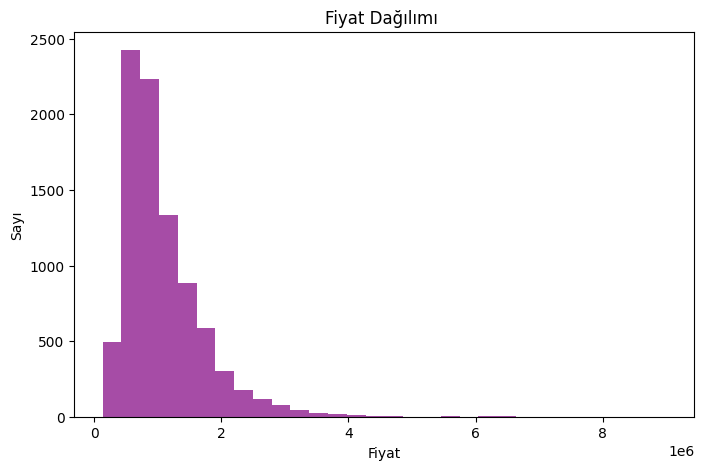

In [ ]:
import matplotlib.pyplot as plt

# Fiyat değişkeninin histogramını oluşturma
plt.figure(figsize=(8, 5))
plt.hist(df['Price'], bins=30, color='purple', alpha=0.7)
plt.xlabel('Fiyat')
plt.ylabel('Sayı')
plt.title('Fiyat Dağılımı ')
plt.show()

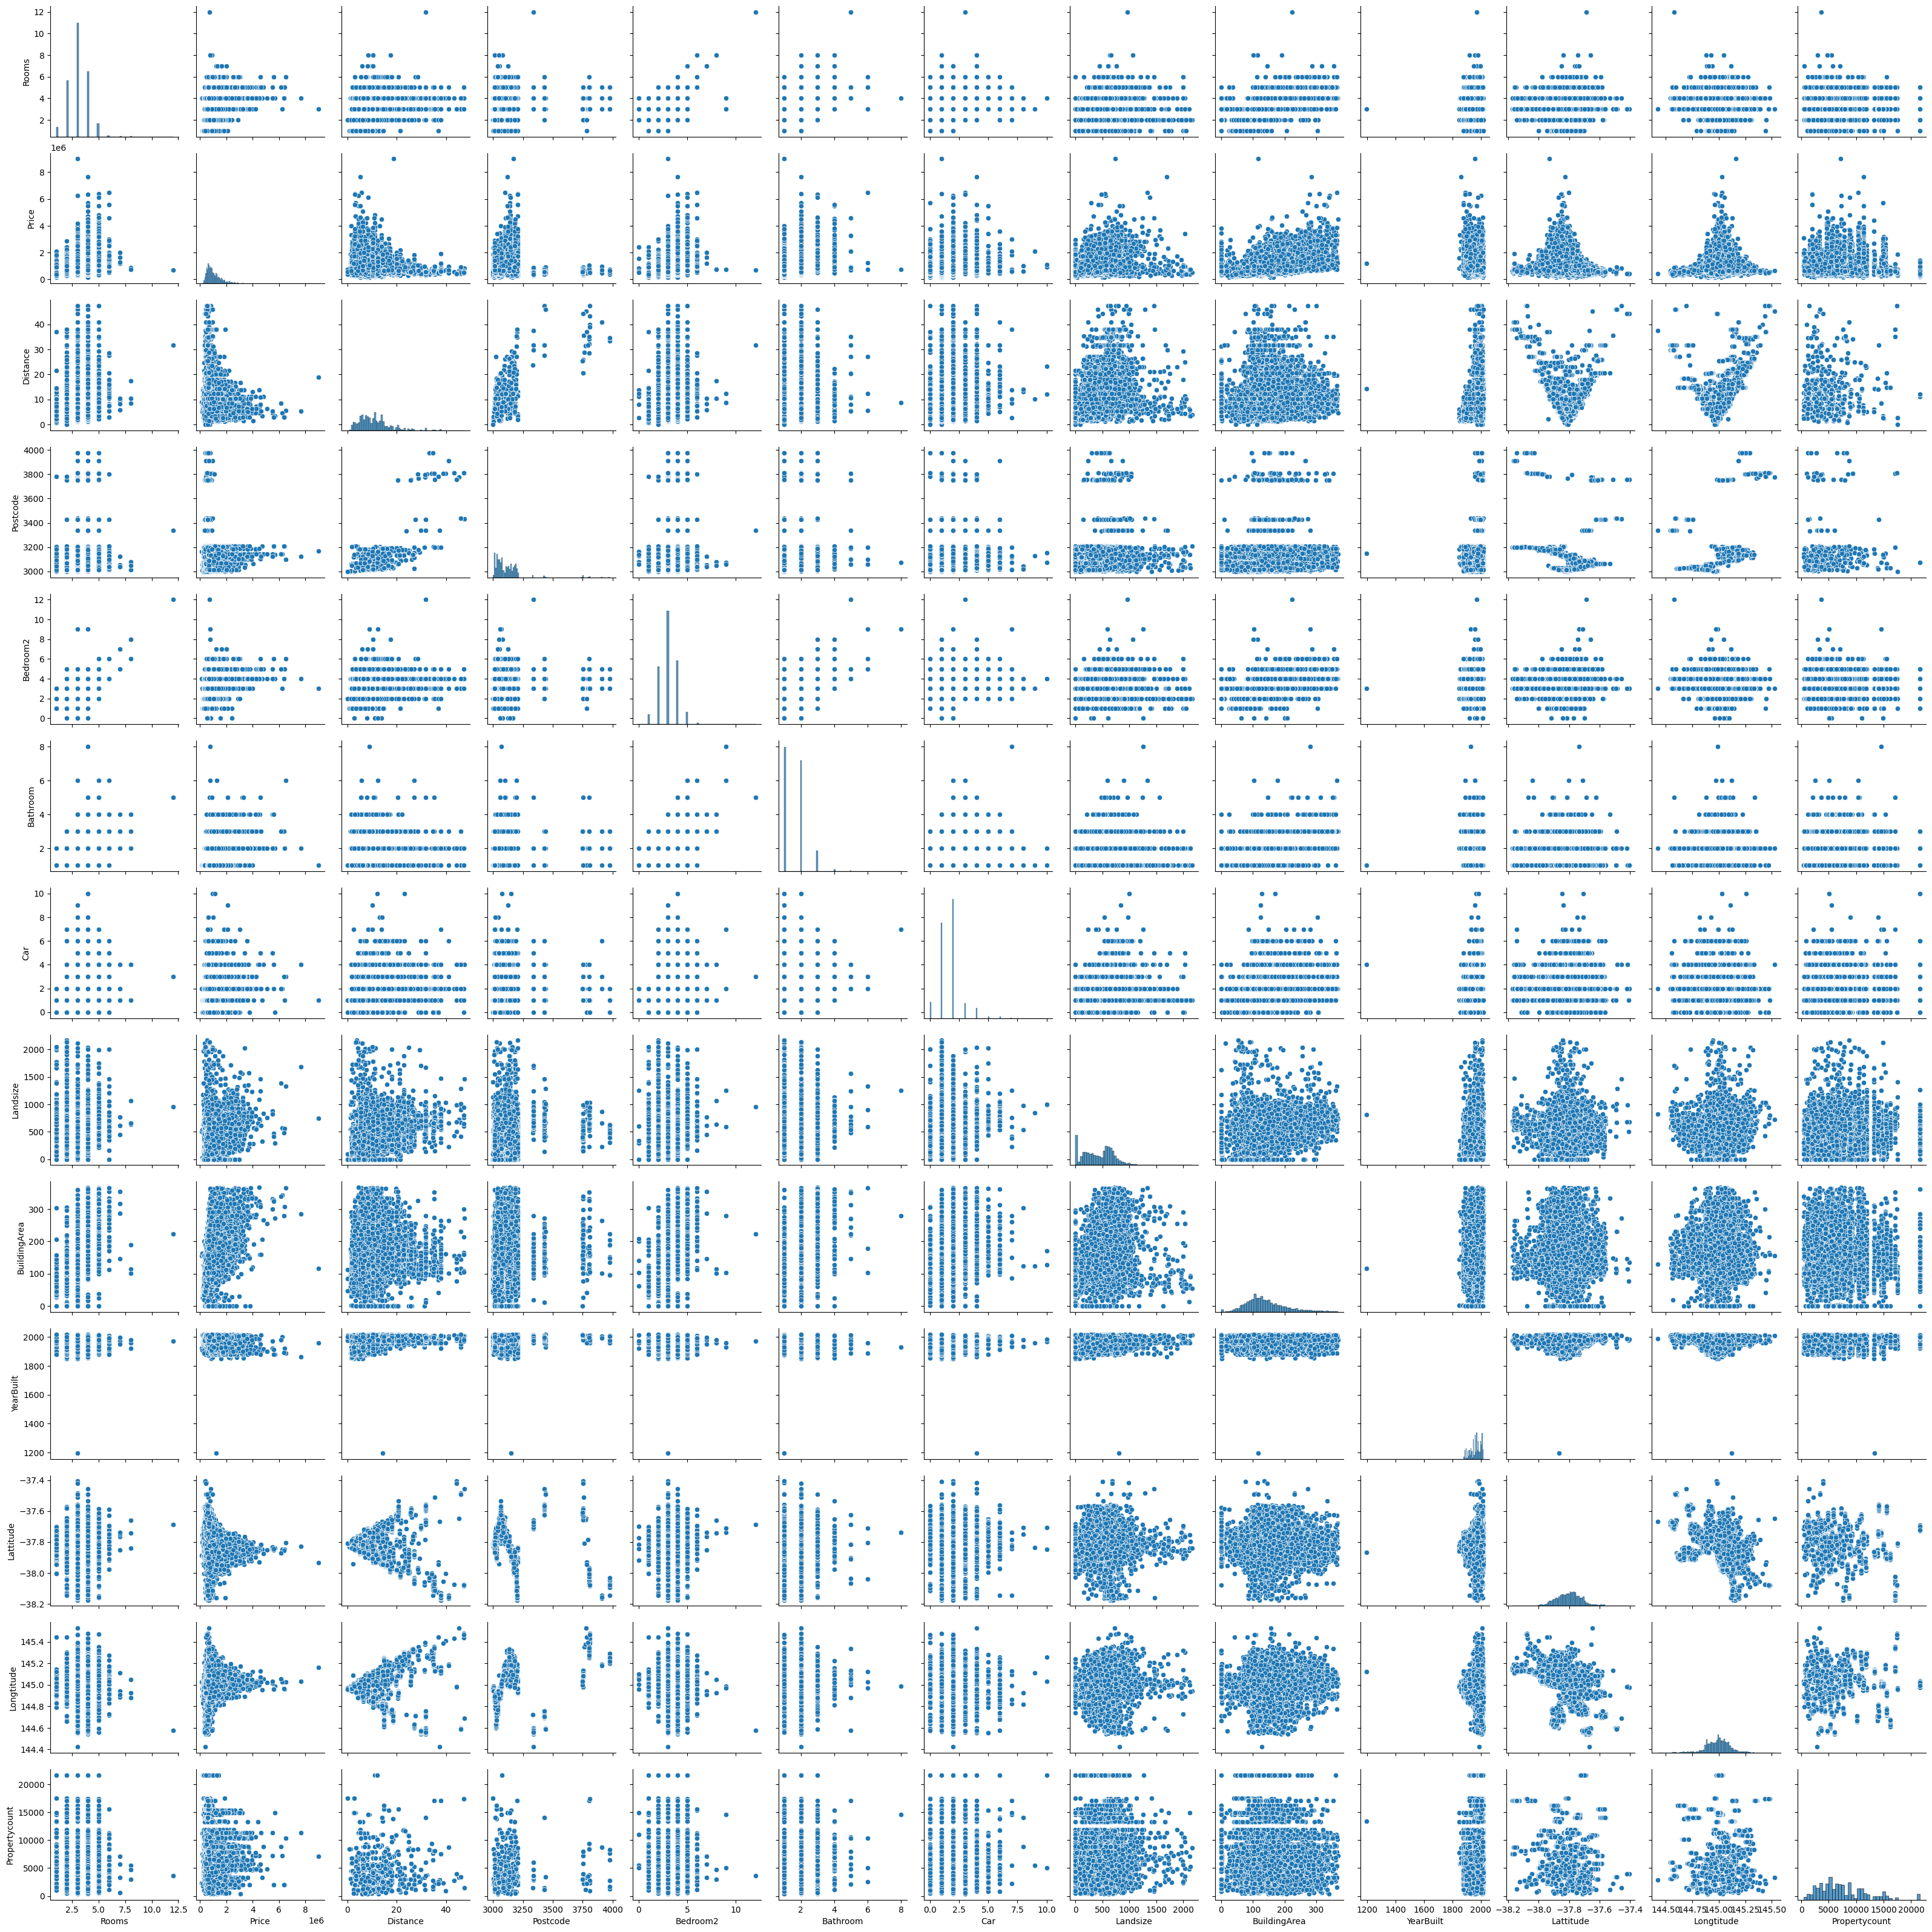

In [54]:
import seaborn as sns
# veri gröselleştrime
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns
# sayısal değişkenleri seçtik
# Tüm sayısal değişkenlerin ve fiyat değişkeninin çift grafik (pair plot) gösterimi
sns.pairplot(df, vars= numerical_columns) # çift graik oluşturduk
plt.show() # göüntüleme

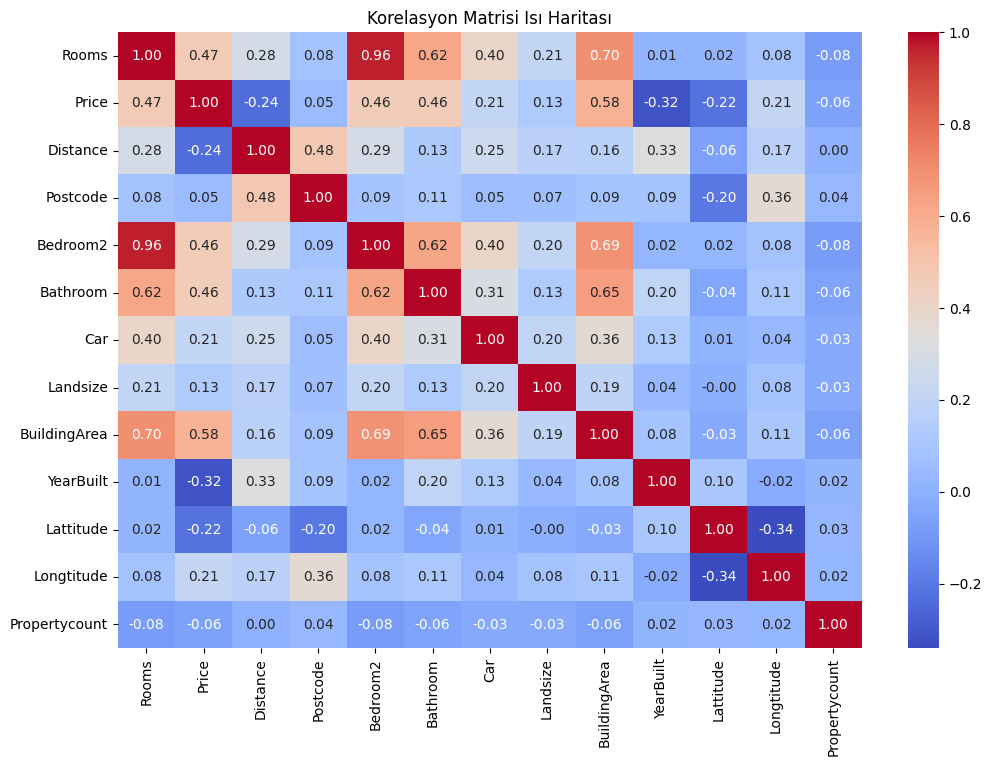

In [ ]:
#
# Korelasyon matrisini hesapla
#select_dtypes() metodu, int64 ve float64 veri türlerine sahip değişkenleri seçer.
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns
correlation_matrix = df[numerical_columns].corr()
#Bu kod, df veri çerçevesindeki sayısal değişkenlerin korelasyonu hesaplar^^

# Korelasyon matrisini ısı haritası olarak göster
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
#annot=True parametresi, ısı haritasına hücre değerlerini ekler
#cmap='coolwarm' parametresi, ısı haritası için renk şemasını ayarlar
#fmt=".2f" parametresi, hücre değerlerinin formatını ayarlar
plt.title('Korelasyon Matrisi Isı Haritası')
plt.show()

In [ ]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
# Label Encoder kullanarak kategorik değişkenleri dönüştürme
categorical_columns = ['Suburb', 'Address', 'Type', 'Method', 'SellerG', 'CouncilArea', 'Regionname']

for column in categorical_columns:
    df[column] = label_encoder.fit_transform(df[column])